In [23]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer





In [24]:
#Reading Data
df=pd.read_csv(r"D:\Data Analysis\GDG-CoreTeam\Air pollution\Dataset\updated_pollution_dataset.csv")

df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [25]:
df['CO'].max()

3.72

In [26]:
#Data summrization
print(f"This data has {df.shape[0]} rows and {df.shape[1]} columns ")
print('-'*50)
df.info()
print('-'*50)
df.describe()

This data has 5000 rows and 10 columns 
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB
------------------

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [27]:
#Rename columns that has complex names
df=df.rename(columns={'PM2.5' : 'Fine particulate matter',
                      'PM10'   :'Coarse particulate matter' , 
                      'Proximity_to_Industrial_Areas' :'Nearest Industrial Areas' ,
           })

In [28]:
# Find Missing values
df.isna().sum()

Temperature                  0
Humidity                     0
Fine particulate matter      0
Coarse particulate matter    0
NO2                          0
SO2                          0
CO                           0
Nearest Industrial Areas     0
Population_Density           0
Air Quality                  0
dtype: int64

In [29]:
#Drop Duplicated rows
df.drop_duplicates()

,Temperature,Humidity,Fine particulate matter,Coarse particulate matter,NO2,SO2,CO,Nearest Industrial Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


# Analysis and Correlations

<function matplotlib.pyplot.show(close=None, block=None)>

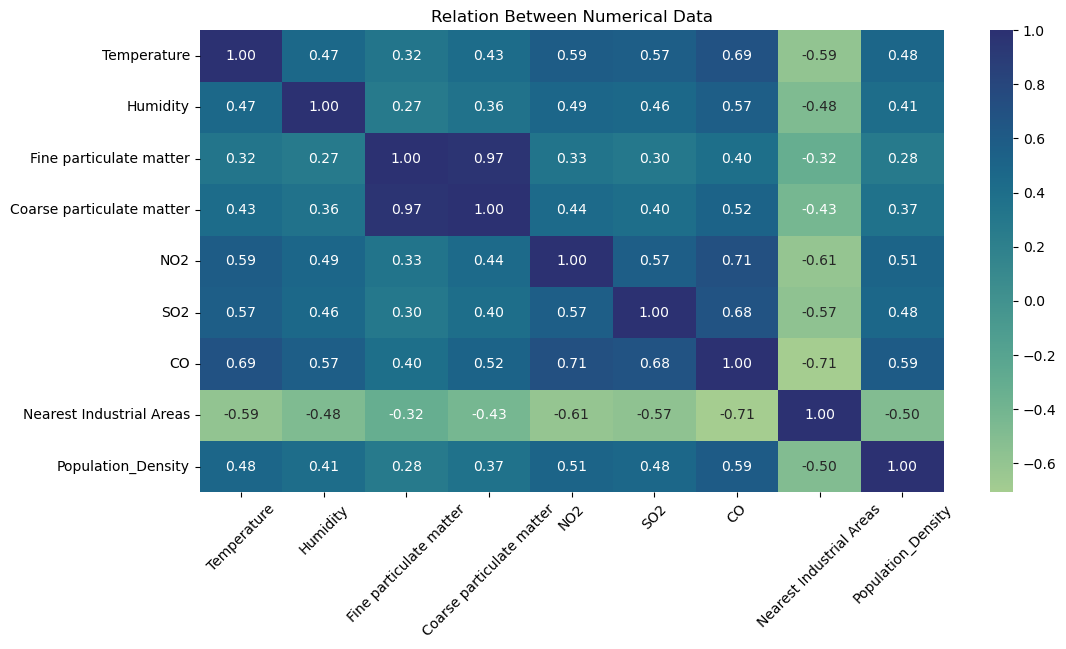

In [30]:
plt.figure(figsize=(12,6))
# Define the columns for correlation
numeric_cols = ['Temperature', 'Humidity', 'Fine particulate matter', 
               'Coarse particulate matter', 'NO2', 'SO2', 'CO', 
               'Nearest Industrial Areas', 'Population_Density'] 

# Calculate the correlation matrix
corr = df[numeric_cols].corr()


sns.heatmap(corr ,annot=True ,fmt='.2f' , cmap="crest" )

plt.xticks(rotation=45) 
plt.title("Relation Between Numerical Data")
plt.show

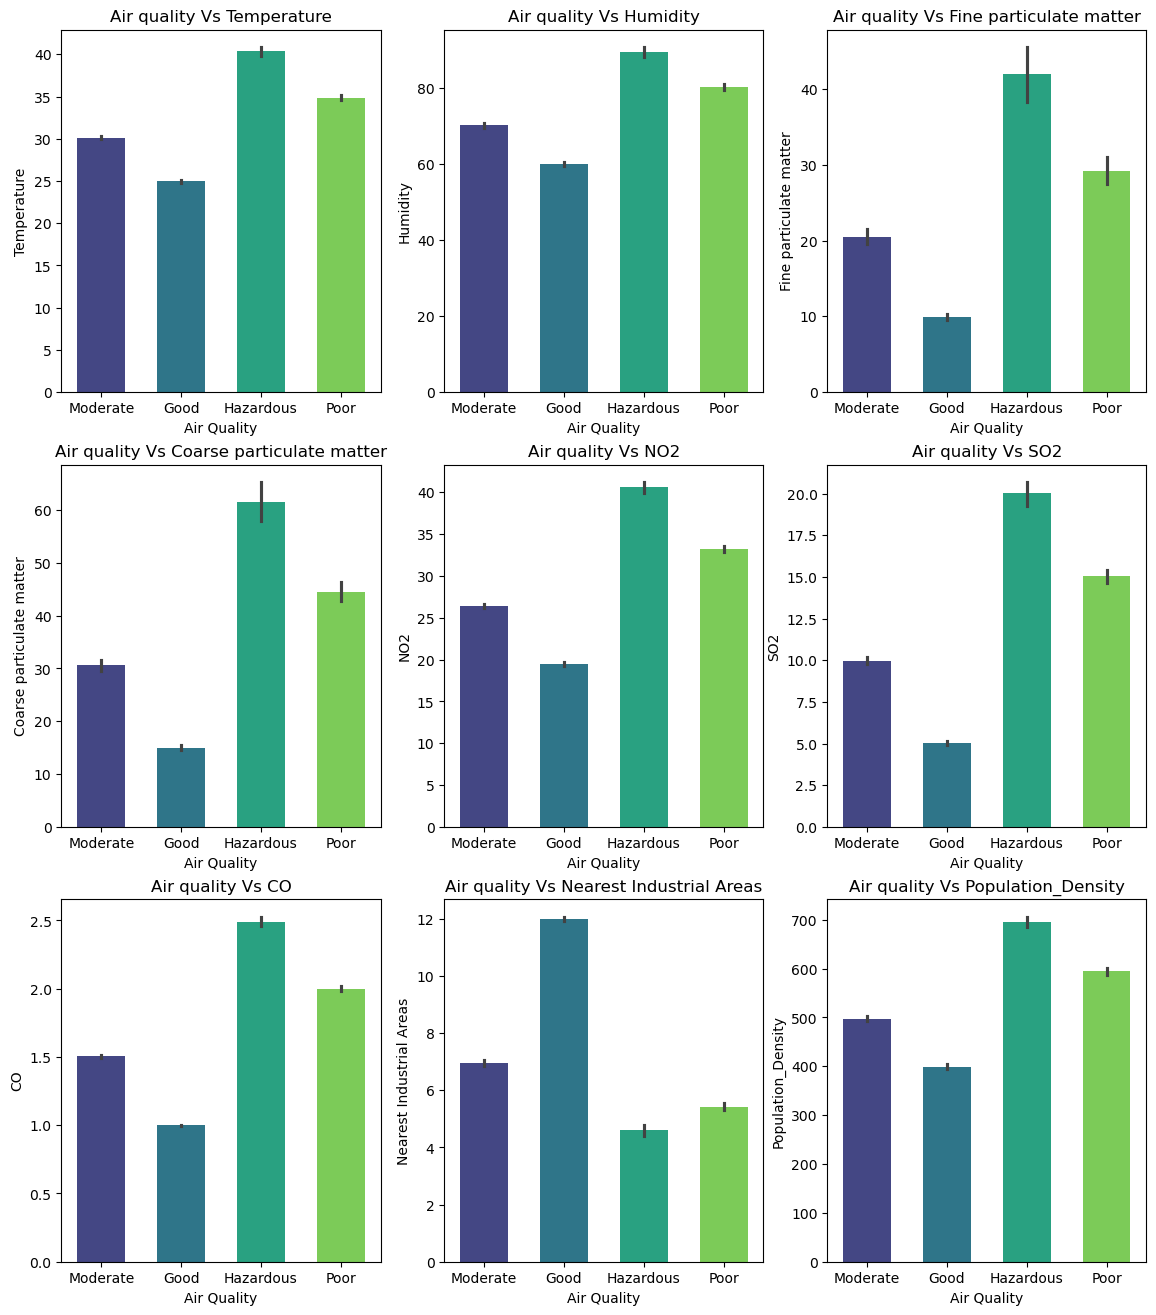

In [31]:
# Explain the relationship between air quality and all other factors.
plt.figure(figsize=(14,16))
c=0
for i in numeric_cols:
  c+=1
  
  plt.subplot(3, 3, c)
  sns.barplot(data=df, x='Air Quality', y=i ,estimator='mean' ,palette='viridis',hue='Air Quality', saturation=0.9 ,width=0.6 )

  plt.title(f"Air quality Vs {i}")
  plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

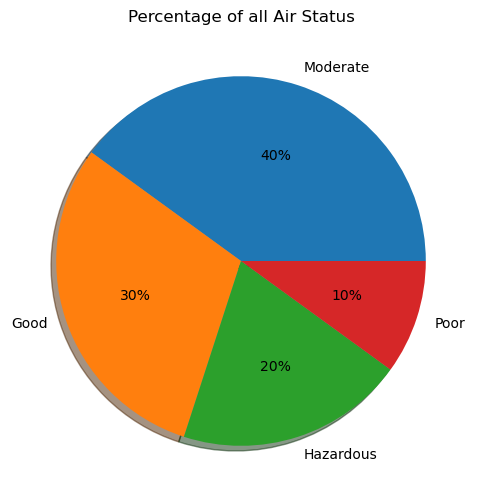

In [32]:
#Percentage of all Air Status
plt.figure(figsize=(8,6))

plt.pie(df['Air Quality'].value_counts() ,labels=df['Air Quality'].unique() 
        ,autopct="%1.f%%" ,shadow=True,)


plt.title("Percentage of all Air Status")
plt.show



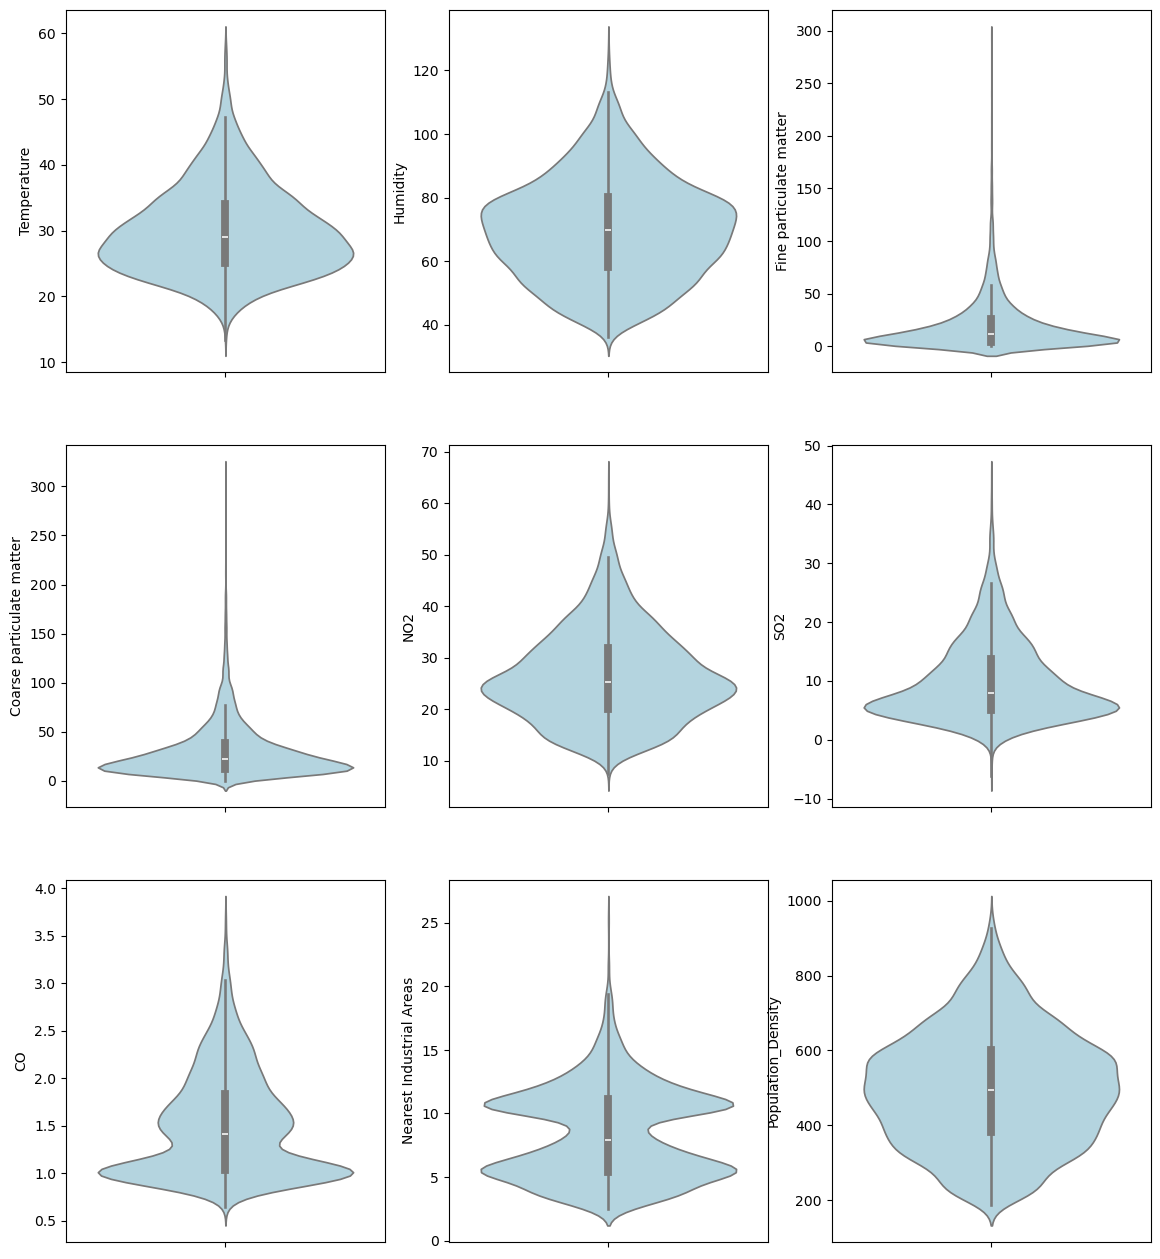

In [33]:

# Show all most frequntly values for each feature
plt.figure(figsize=(14,16))
c=0
for i in numeric_cols:
  c+=1
  
  plt.subplot(3, 3, c)
  sns.violinplot(y=df[i] ,color='lightblue')
  plt.show

## preprocessing

In [34]:
#Scale all numerical Data
scaler = RobustScaler()

df[numeric_cols]= scaler.fit_transform(df[numeric_cols])


df[numeric_cols].head()

,Temperature,Humidity,Fine particulate matter,Coarse particulate matter,NO2,SO2,CO,Nearest Industrial Areas,Population_Density
0,0.089888,-0.486364,-0.316279,-0.147287,-0.542373,0.139130,0.382716,-0.280702,-0.799087
1,-0.078652,0.263636,-0.451163,-0.368217,0.466102,0.197101,0.283951,-0.333333,0.534247
2,-0.662921,0.222727,0.683721,0.468992,-0.076271,0.533333,0.271605,-0.473684,0.570776
3,-0.213483,-1.395455,-0.274419,-0.596899,-1.000000,-0.313043,-0.320988,0.561404,0.260274
4,-0.280899,0.040909,-0.237209,-0.220930,-0.288136,-0.278261,-0.493827,0.842105,-0.872146


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1400x1400 with 0 Axes>

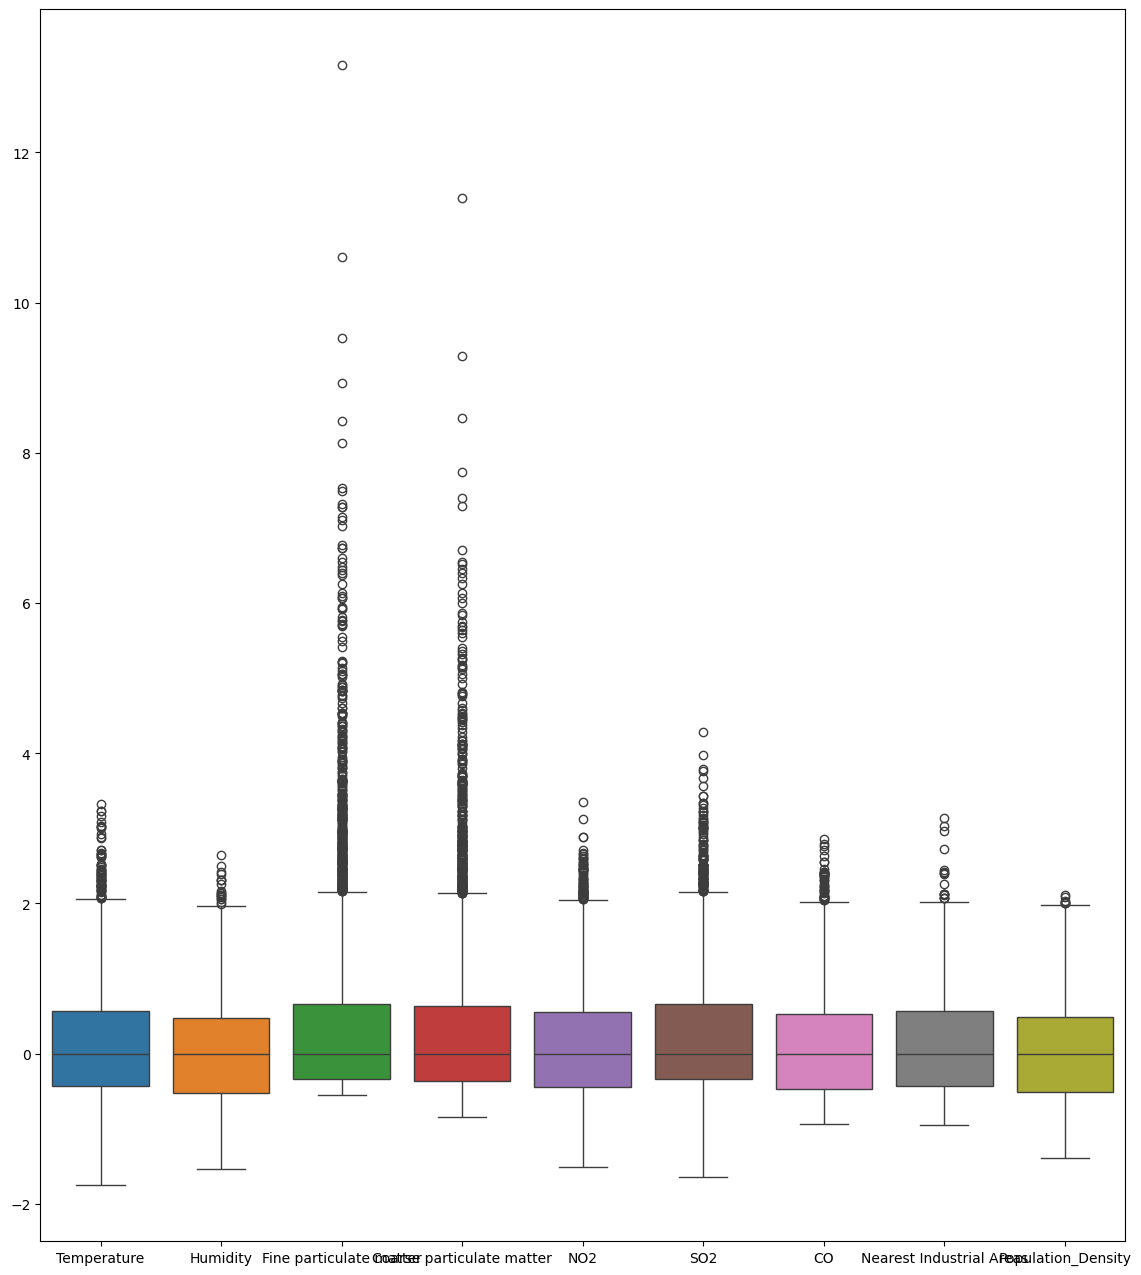

In [35]:
#Handle outliers data
plt.figure(figsize=(14,14))

plt.figure(figsize=(14,16))

sns.boxplot(data=df[numeric_cols])
plt.show

In [36]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

non_outlierd_data = df[(df[numeric_cols] >= lower_bound) & (df[numeric_cols] <= upper_bound)]



<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x400 with 0 Axes>

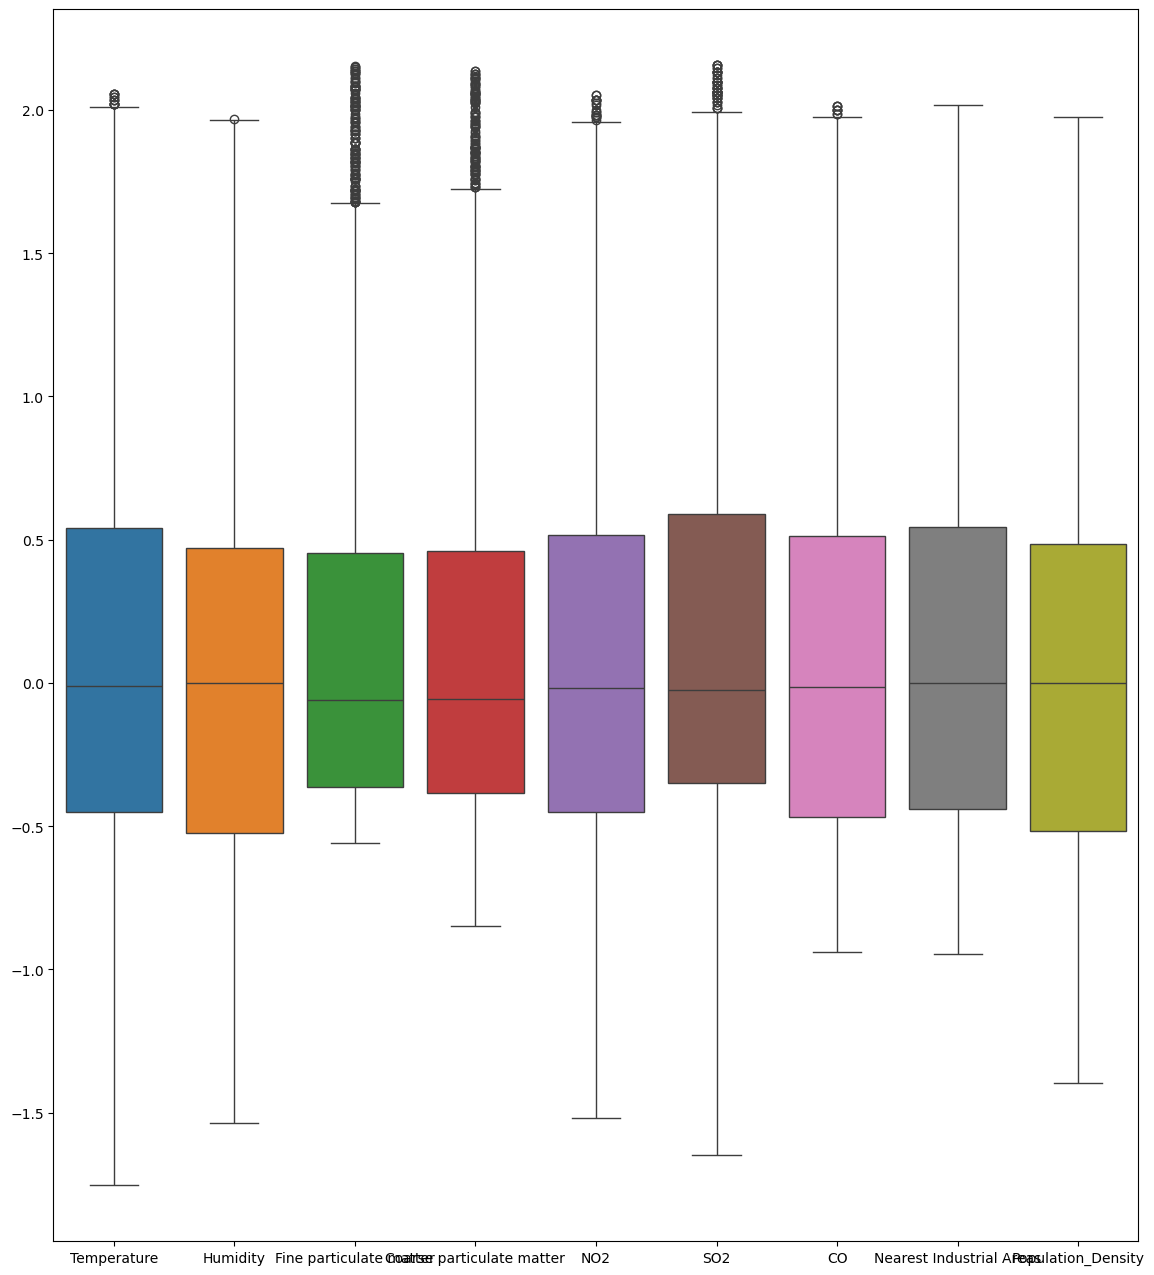

In [37]:
#Data After all outlier removed
plt.figure(figsize=(10,4))

plt.figure(figsize=(14,16))

sns.boxplot(data=non_outlierd_data[numeric_cols])
plt.show

In [38]:
# Collect all data together
non_outlierd_data['Air Quality']=df['Air Quality']


In [39]:
#Encoding for categoral  Data
encoder = LabelEncoder()
non_outlierd_data['Air Quality'] = encoder.fit_transform(non_outlierd_data['Air Quality'] )



In [40]:
non_outlierd_data.head()

,Temperature,Humidity,Fine particulate matter,Coarse particulate matter,NO2,SO2,CO,Nearest Industrial Areas,Population_Density,Air Quality
0,0.089888,-0.486364,-0.316279,-0.147287,-0.542373,0.139130,0.382716,-0.280702,-0.799087,2
1,-0.078652,0.263636,-0.451163,-0.368217,0.466102,0.197101,0.283951,-0.333333,0.534247,2
2,-0.662921,0.222727,0.683721,0.468992,-0.076271,0.533333,0.271605,-0.473684,0.570776,2
3,-0.213483,-1.395455,-0.274419,-0.596899,-1.000000,-0.313043,-0.320988,0.561404,0.260274,0
4,-0.280899,0.040909,-0.237209,-0.220930,-0.288136,-0.278261,-0.493827,0.842105,-0.872146,0


## Logistic Model Training

In [41]:
#select our feature and tragets
features = non_outlierd_data[numeric_cols]
target = non_outlierd_data['Air Quality']


#Handle missing values
imputer = SimpleImputer(strategy='median')
features = imputer.fit_transform(features)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)


# Create and train the LogisticRegression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_train, y_train)

# Make predictions on testing data
y_pred = model.predict(x_test)

# Evaluate model performance
score = model.score(x_test, y_test)
print(f"Test Accuracy Score: {round(score*100,2)}%")


Test Accuracy Score: 91.07%


c:\Users\BS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


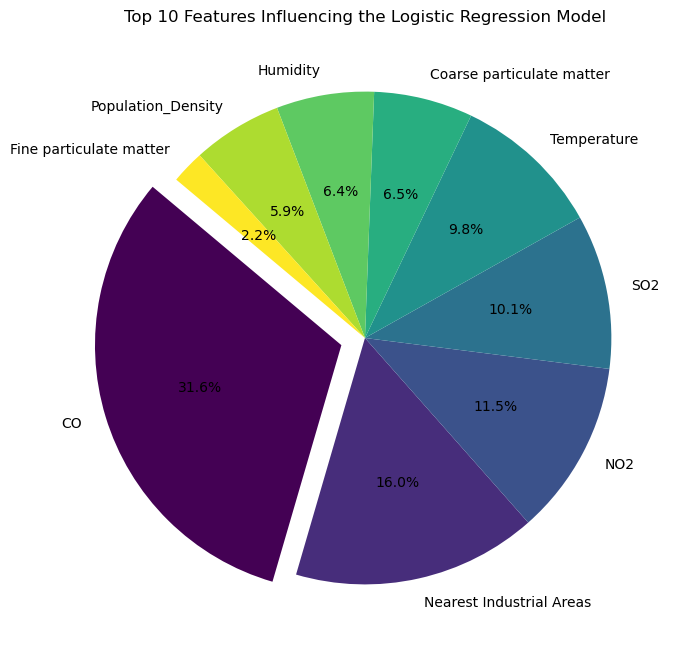

In [42]:

# Pie Chart for Feature Importance with Viridis Palette
feature_importance = pd.DataFrame({
    'feature': non_outlierd_data[numeric_cols].columns,
    'importance': abs(model.coef_[0])  # Taking the absolute value of coefficients
}).sort_values('importance', ascending=False)


# Generate colors using the Viridis colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
explode = [0.1 if i == 0 else 0 for i in range(len(feature_importance))]


# Plotting
plt.figure(figsize=(8, 8))
plt.pie(
    feature_importance['importance'],
    labels=feature_importance['feature'],
    autopct='%1.1f%%',  # Show percentage
    startangle=140,
    colors=colors,
    # shadow=True,
    explode=explode
)
plt.title('Top 10 Features Influencing the Logistic Regression Model')
plt.show()



Now ,We notice That the percantage of CO in the Air is th most imporatant feature
that affect on the air quality :)

In [43]:
feature_importance.head(10)

,feature,importance
6,CO,7.818343
7,Nearest Industrial Areas,3.967814
4,NO2,2.837947
5,SO2,2.508006
0,Temperature,2.419431
3,Coarse particulate matter,1.606524
1,Humidity,1.584554
8,Population_Density,1.459219
2,Fine particulate matter,0.539725


In [44]:
# Save model and preprocessing artifacts
import joblib

joblib.dump(model, '../src/trained_model.pkl')
joblib.dump(scaler, '../src/scaler.pkl')
joblib.dump(encoder, '../src/encoder.pkl')

with open('../src/feature_names.txt', 'w') as f:
    f.write('\n'.join(non_outlierd_data[numeric_cols].columns))